# Gradient Descent

If you successfully completed the previous notebook, you'll now have a good understanding that we can view the log-likelihood function as a landscape.  Unfortunately, it's the rare problem for which that landscape actually exists in 2-dimensions like our own physical topography.  Indeed, for machine learning this landscape often has thousands or millions of dimensions.  This precludes the possibility of finding optimal solutions through grid searches.

The alternative to brute force is gradient descent.  Here we'll take the convention of trying to minimize a so-called *cost function*, which for our purposes is just -1 times the log-posterior we've been working with (for historical reasons, the machine learning literature tends to think of optimization problems in terms of minimizing a cost function, as opposed to maximizing a log-posterior, even though the two viewpoints are equivalen).  For the lobster problem, the cost function to minimize is 
$$
\mathcal{L}(\mathbf{w};\mathbf{X}_{obs},\mathbf{Y}_{obs}) = -\sum_{i=1}^m \left[Y_{obs,i} \ln \sigma(\Phi_i \mathbf{w}) + (1-Y_{obs,i}) \ln (1-\sigma(\Phi_i \mathbf{w}))\right] + \lambda \mathbf{w}^T \mathbf{w}. 
$$
The gradient of this function is 
$$
\nabla_\mathbf{w} \mathcal{L} = -\sum_{i=1}^m \left[ (Y_{obs,i} - \sigma(\Phi_i \mathbf{w})) \Phi_i\right] + \lambda\mathbf{w}^T. 
$$
Gradient descent is implemented by sequentially updating the model parameters as
$$
\mathbf{w}_{t+1} = \mathbf{w}_t - \eta \nabla_{\mathbf{w}} \mathcal{L}.
$$
**Return to the lobster problem, and attempt to find the optimal value of $\mathbf{w}$ using gradient descent.  You'll have to select both a sensible initial guess for $\mathbf{w}$, as well as a value of $\eta$: too big, and it'll do some crazy things, too small and you won't get anywhere.  Because you've already solved this problem using grid search, you know the solution that you're trying to achieve.  Plot the trajectory of parameter values over the loss surface that you constructed for the brute force method (this is very helpful for debugging).**

In [59]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
data = np.loadtxt('datasets/lobster_survive.dat',skiprows=1)
X,Y = data.T
X -= X.mean()
X /= X.std()

In [54]:
def L(w,X,Y, phi, lamda=0):
    sum_total = 0
    for i in range(len(X)):
        first_term = Y[i]*np.log(sigmoid(phi[i,:]@w))
        second_term = (1-Y[i])*np.log(1-sigmoid(phi[i,:]@w))
        sum_total += first_term + second_term
    third_term = lamda * np.transpose(w)@w
    return third_term + sum_total

def sigmoid(z):
    return 1/(1+np.exp(-z))

def Phi(X, d=1):
    return_phi = np.ones((len(X),d+1))
    for i in range(1,d+1):
        return_phi[:,i] = np.power(X,i)
    return return_phi

phi = Phi(X, d=2)

def L_grad_func(Y,w,lamda=0):
    m = len(Y)
    return_sum = 0
    for i in range(m):
        return_sum += (Y[i] - sigmoid(phi[i,:]@w))*phi[i,:]
    return lamda*np.transpose(w) - return_sum

In [55]:
num = 10
L_array = np.ones((num,num, num))
w0_vec = np.linspace(-1,1,num)
w1_vec = np.linspace(0,2,num)
w2_vec = np.linspace(-1, 1, num)

for i in range(w0_vec.size):
    for j in range(w1_vec.size):
        for k in range(w2_vec.size):
            L_array[i,j,k] = L([w0_vec[i],w1_vec[j],w2_vec[k]],X,Y, phi)
        
result = np.where(L_array == np.amax(L_array))
indices = result[0][0],result[1][0]
w_grid = [w0_vec[indices[0]], w1_vec[indices[1]]]
print(w_grid)

[0.11111111111111116, 1.3333333333333333]


In [49]:
tol = 1e-1
eta = 1e-1
max_iters = 100
current_tol = 100
iters = 0
# w0 = [w_grid[0]]
# w1 = [w_grid[1]]
w0_1 = [-1]
w1_1 = [0]
while current_tol > tol and iters < max_iters:
    w_curr = np.array([w0_1[-1], w1_1[-1]])
    w_new = w_curr - eta * L_grad_func(Y,w_curr)
    w0_1.append(w_new[0])
    w1_1.append(w_new[1])
    current_tol = np.sqrt((w_new[0]-w_curr[0])**2 + (w_new[1]-w_curr[1])**2)
    iters += 1
print([w0_1[-1], w1_1[-1]])

# w0_2 = [1]
# w1_2 = [2]
# current_tol = 100
# while current_tol > tol:
#     w_curr = np.array([w0_2[-1], w1_2[-1]])
#     w_new = w_curr - eta * L_grad_func(Y,w_curr)
#     w0_2.append(w_new[0])
#     w1_2.append(w_new[1])
#     current_tol = np.sqrt((w_new[0]-w_curr[0])**2 + (w_new[1]-w_curr[1])**2)
# print([w0_2[-1], w1_2[-1]])

# w0_3 = [0]
# w1_3 = [.25]
# current_tol = 100
# while current_tol > tol:
#     w_curr = np.array([w0_3[-1], w1_3[-1]])
#     w_new = w_curr - eta * L_grad_func(Y,w_curr)
#     w0_3.append(w_new[0])
#     w1_3.append(w_new[1])
#     current_tol = np.sqrt((w_new[0]-w_curr[0])**2 + (w_new[1]-w_curr[1])**2)
# print([w0_3[-1], w1_3[-1]])

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 2 is different from 3)

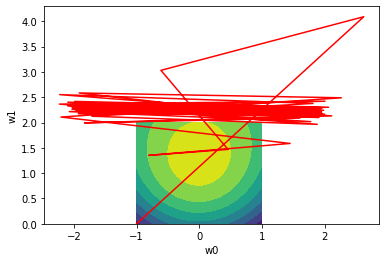

In [34]:
plt.contourf(w0_vec,w1_vec,L_array.T)
plt.plot(w0_1, w1_1, c='r')
# plt.scatter(w0_2, w1_2, c='b')
# plt.scatter(w0_3, w1_3, c='purple')
plt.xlabel('w0')
plt.ylabel('w1')
plt.show()